In [ ]:
!pip install matplotlib==3.5.2

In [5]:
import matplotlib.pyplot as plt
from matplotlib.scale import LogScale
from typing import Dict, Any, List
import numpy as np 

# TODO: Run experiments for other models.

In [7]:
def save_fig(save_path: str):
    plt.savefig(save_path, bbox_inches="tight", dpi=600)

def _plot_scaling_performance(
    experiments: Dict[str, Dict[str, Any]],
    node_range: List[int],
) -> None:


    fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
    plt.ylabel("Performance (samples/sec)", fontsize=16)
    plt.xlabel("Number of Nodes", fontsize=16)
    
    # We change the fontsize of tick labels 
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    # Add top and right tick marks
    ax.tick_params(top=True, right=True, direction="in")
    
    # Set axis scale
    x_scalar = LogScale(ax, base=2)
    y_scalar = LogScale(ax, base=10)
    ax.set_xscale(x_scalar)
    ax.set_yscale(y_scalar)

        
    for name, experiment in experiments.items():
        
        marker = experiment["marker"]
        color = experiment["color"]
        nodes = experiment["nodes"]
        throughputs = experiment["thoughputs"]
        
        # if name == "GPT-NeoX 25B":
        #     ideal = [throughputs[3]/16] 
        # else:
        ideal = [throughputs[0]]
        for i in range(1, len(nodes)): 
            factor = nodes[i] // nodes[i-1]
            new_val = ideal[i-1] * factor 
            ideal.append(new_val)

        plt.plot(nodes, throughputs, c=color, marker=marker, markersize=10, label=name)
        plt.plot(nodes, ideal, linestyle="dashed", c=color, linewidth=1)

    # Label x axis and set label locations
    ax.set_xticks(node_range)
    ax.set_xticklabels(node_range)

    # Set legend
    plt.legend(loc="upper center", ncol=2, title="", frameon=False, bbox_to_anchor=(0.5, -0.05), borderpad=1.5)
    
def plot_scaling_performance(
    experiments: Dict[str, Dict[str, Any]],
    node_range: List[int],
) -> None:
    with plt.style.context('seaborn-poster'):
        plt.rcParams["font.family"] = "avenir"
        _plot_scaling_performance(experiments, node_range)

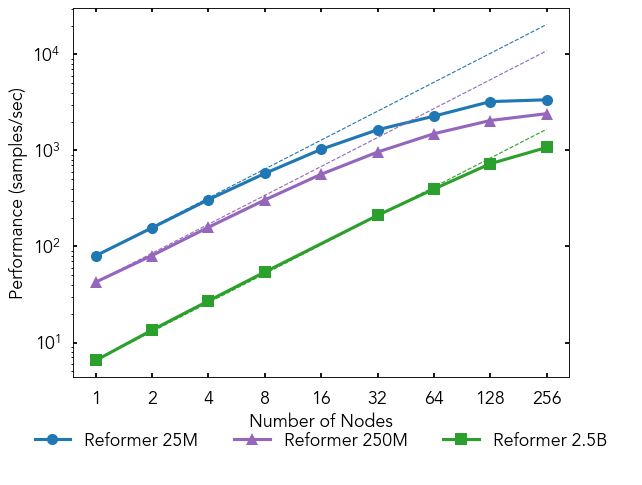

In [8]:
experiments = {
    "Reformer 25M": {
        "color": "tab:blue",
        "marker": "o",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [80.081, 156.657, 307.445, 576.249, 1027.873, 1641.973, 2275.963, 3226.762, 3371.091],
    },
    "Reformer 250M": {
        "color": "tab:purple",
        "marker": "^",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [42.57, 80.546, 158.595, 305.066, 565.139, 962.113, 1493.05, 2050.49, 2416.772],
    },
    "Reformer 2.5B": {
        "color": "tab:green",
        "marker": "s",
        "nodes": [1.0, 2.0, 4.0, 8.0, 32.0, 64.0, 128.0, 256.0], 
        "thoughputs": [6.498, 13.482, 27.133, 54.161, 210.943, 396.31, 727.133, 1075.22],
    },
}

node_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]

plot_scaling_performance(experiments, node_range)
save_fig("figures/perlmutter-reformer-scaling.png")
plt.show()

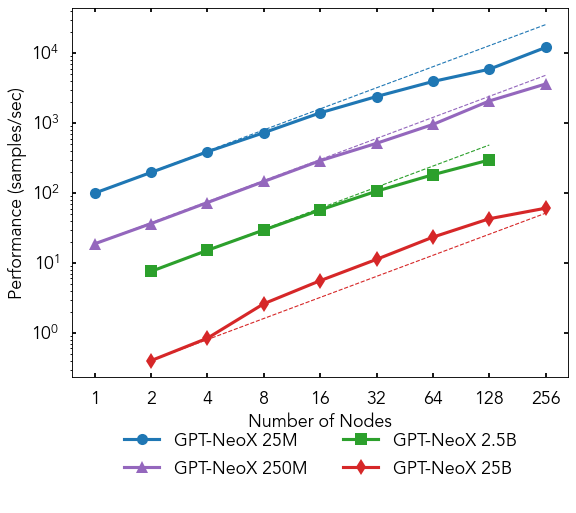

In [27]:
experiments = {
    "GPT-NeoX 25M": {
        "color": "tab:blue",
        "marker": "o",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [99.69, 196.89, 388.69, 727.55, 1399.26, 2393.12, 3924.46, 5877.20, 12038.14],
    },
    "GPT-NeoX 250M": {
        "color": "tab:purple",
        "marker": "^",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [18.8, 36.57, 73.03, 146.14, 289.31, 513.41, 954.06, 2067.22, 3616.43],
    },
    "GPT-NeoX 2.5B": {
        "color": "tab:green",
        "marker": "s",
        "nodes": [ 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0], 
        "thoughputs": [7.58, 15.18, 29.59, 57.24, 106.18, 182.48, 296.30],
    },
    "GPT-NeoX 25B": {
        "color": "tab:red",
        "marker": "d",
        "nodes": [2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0], 
        "thoughputs": [0.402, 0.841, 2.615, 5.582, 11.262, 23.401, 42.86, 60.661],
    }
}

node_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]

plot_scaling_performance(experiments, node_range)
save_fig("figures/polaris-gptneox-scaling.png")
plt.show()

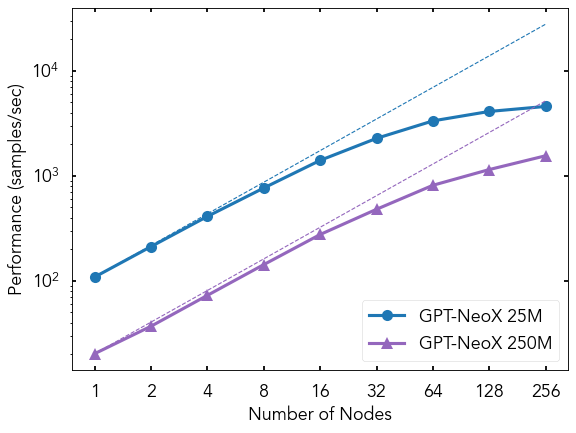

In [3]:
experiments = {
    "GPT-NeoX 25M": {
        "color": "tab:blue",
        "marker": "o",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [108.729, 212.008, 410.799, 766.326, 1404.293, 2275.304, 3336.852, 4105.119, 4581.867],
    },
    "GPT-NeoX 250M": {
        "color": "tab:purple",
        "marker": "^",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [20.232, 36.934, 72.720, 142.722, 276.09, 480.087, 812.663, 1147.558, 1552.699],
    },
    # "GPT-NeoX 2.5B": {
    #     "color": "tab:green",
    #     "marker": "s",
    #     "nodes": [ 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0], 
    #     "thoughputs": [],
    # },
}

node_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]

plot_scaling_performance(experiments, node_range)
save_fig("figures/perlmutter-gptneox-scaling.png") # With non-virtual HDF5
plt.show()

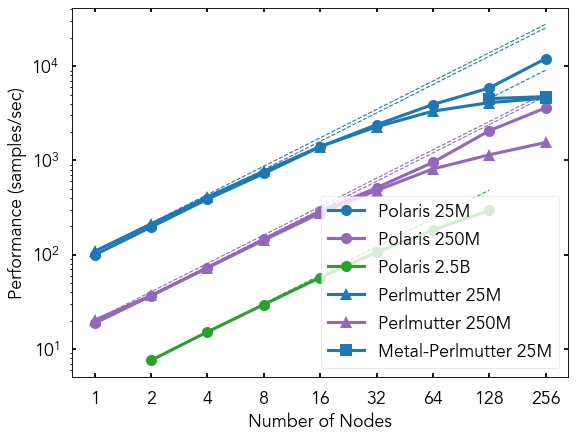

In [9]:
experiments = {
    "Polaris 25M": {
        "color": "tab:blue",
        "marker": "o",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [99.69, 196.89, 388.69, 727.55, 1399.26, 2393.12, 3924.46, 5877.20, 12038.14],
    },
    "Polaris 250M ": {
        "color": "tab:purple",
        "marker": "o",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [18.8, 36.57, 73.03, 146.14, 289.31, 513.41, 954.06, 2067.22, 3616.43],
    },
    "Polaris 2.5B": {
        "color": "tab:green",
        "marker": "o",
        "nodes": [ 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0], 
        "thoughputs": [7.58, 15.18, 29.59, 57.24, 106.18, 182.48, 296.30],
    },
    "Perlmutter 25M": {
        "color": "tab:blue",
        "marker": "^",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [108.729, 212.008, 410.799, 766.326, 1404.293, 2275.304, 3336.852, 4105.119, 4581.867],
    },
    "Perlmutter 250M": {
        "color": "tab:purple",
        "marker": "^",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [20.232, 36.934, 72.720, 142.722, 276.09, 480.087, 812.663, 1147.558, 1552.699],
    },
    "Metal-Perlmutter 25M": {
        "color": "tab:blue",
        "marker": "s",
        "nodes": [128.0, 256.0],
        "thoughputs": [4534.711, 4752.182],
    },
}

node_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]

plot_scaling_performance(experiments, node_range)
#save_fig("figures/polaris-gptneox-scaling.png")
plt.show()

In [ ]:
# 673 samples/second for seqlength 10240 for 25M on 128 nodes (Polaris)

In [66]:
def _plot_scaling_performance_gpus(
    experiments: Dict[str, Dict[str, Any]],
    node_range: List[int],
    ncol=2
) -> None:


    fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
    plt.ylabel("Performance (samples/sec)", fontsize=16)
    plt.xlabel("Number of GPUs", fontsize=16)
    
    # We change the fontsize of tick labels 
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    # Add top and right tick marks
    ax.tick_params(top=True, right=True, direction="in")
    
    # Set axis scale
    x_scalar = LogScale(ax, base=2)
    y_scalar = LogScale(ax, base=10)
    ax.set_xscale(x_scalar)
    ax.set_yscale(y_scalar)

        
    for name, experiment in experiments.items():
        
        marker = experiment["marker"]
        color = experiment["color"]
        gpus = experiment["gpus"]
        throughputs = experiment["thoughputs"]
        nodes = experiment["nodes"]
        
        # if name == "GPT-NeoX 25B":
        #     ideal = [throughputs[3]/16] 
        # else:
        ideal = [throughputs[0]]
        for i in range(1, len(nodes)): 
            factor = nodes[i] // nodes[i-1]
            new_val = ideal[i-1] * factor 
            ideal.append(new_val)

        plt.plot(gpus, throughputs, c=color, marker=marker, markersize=10, label=name)
        plt.plot(gpus, ideal, linestyle="dashed", c=color, linewidth=1)

    # Label x axis and set label locations
    ax.set_xticks(node_range)
    ax.set_xticklabels(node_range)

    # Set legend
    plt.legend(loc="upper center", ncol=ncol, title="", frameon=False, bbox_to_anchor=(0.5, -0.05), borderpad=1.5)
    
def plot_scaling_performance_gpus(
    experiments: Dict[str, Dict[str, Any]],
    node_range: List[int],
    ncol=2
) -> None:
    with plt.style.context('seaborn-poster'):
        plt.rcParams["font.family"] = "avenir"
        _plot_scaling_performance_gpus(experiments, node_range, ncol)

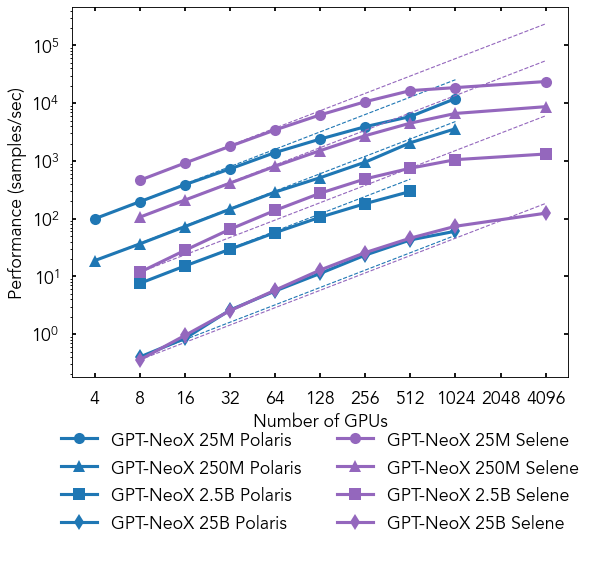

In [51]:
experiments = {
    "GPT-NeoX 25M Polaris": {
        "color": "tab:blue",
        "marker": "o",
        "gpus": [4 * x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [99.69, 196.89, 388.69, 727.55, 1399.26, 2393.12, 3924.46, 5877.20, 12038.14],
    },
    "GPT-NeoX 250M Polaris": {
        "color": "tab:blue",
        "marker": "^",
        "gpus": [4 *x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [18.8, 36.57, 73.03, 146.14, 289.31, 513.41, 954.06, 2067.22, 3616.43],
    },
    "GPT-NeoX 2.5B Polaris": {
        "color": "tab:blue",
        "marker": "s",
        "gpus": [4 * x for x in [ 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]],
        "nodes": [ 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0], 
        "thoughputs": [7.58, 15.18, 29.59, 57.24, 106.18, 182.48, 296.30],
    },
    "GPT-NeoX 25B Polaris": {
        "color": "tab:blue",
        "marker": "d",
        "gpus": [4*x for x in [2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0]],
        "nodes": [2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0], 
        "thoughputs": [0.402, 0.841, 2.615, 5.582, 11.262, 23.401, 42.86, 60.661],
    },
    "GPT-NeoX 25M Selene": {
        "color": "tab:purple",
        "marker": "o",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128, 512]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128, 512], 
        "thoughputs": [463.065, 919.896, 1793.339, 3443.261, 6276.428, 10619.88, 16527.193, 18635.293, 23733.141]
    }, 
    "GPT-NeoX 250M Selene": {
        "color": "tab:purple",
        "marker": "^",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16, 32, 64, 128, 512]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16, 32, 64, 128, 512], 
        "thoughputs": [106.229, 210.121, 413.342, 808.874, 1509.376, 2741.311, 4517.886, 6651.950, 8705.693]
    },
    "GPT-NeoX 2.5B Selene": {
        "color": "tab:purple",
        "marker": "s",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128, 512]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128, 512], 
        "thoughputs": [11.822, 28.283, 65.589, 139.286, 276.247, 489.100, 749.027, 1052.997, 1318.296]
    },
    "GPT-NeoX 25B Selene": {
        "color": "tab:purple",
        "marker": "d",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8, 16, 32, 64, 128, 512]],
        "nodes": [1.0, 2.0, 4.0, 8, 16, 32, 64, 128, 512], 
        "thoughputs": [0.359, 0.950, 2.551, 5.780, 12.915, 25.852, 46.035, 73.898, 124.391]
    }
}

node_range = [4*x for x in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]]

plot_scaling_performance_gpus(experiments, node_range)
save_fig("figures/polaris-and-selene-gptneox-scaling_2048.png")
plt.show()

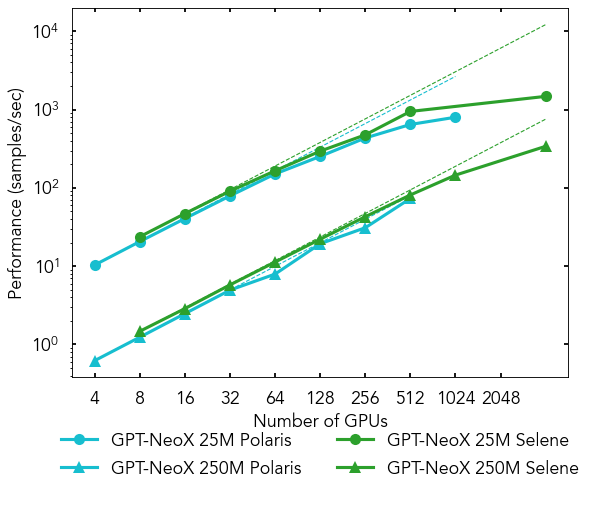

In [55]:
experiments = {
    "GPT-NeoX 25M Polaris": {
        "color": "tab:cyan",
        "marker": "o",
        "gpus": [4 * x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [10.366, 20.632, 40.574, 79.055, 150.840, 252.487, 433.894, 645.948, 799.165],
    },
    "GPT-NeoX 250M Polaris": {
        "color": "tab:cyan",
        "marker": "^",
        "gpus": [4 *x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0],
        "thoughputs": [0.622, 1.24,  2.478, 4.946, 7.927, 19.350, 30.969, 73.315],
    },
    "GPT-NeoX 25M Selene": {
        "color": "tab:green",
        "marker": "o",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 512]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 512], 
        "thoughputs": [23.793, 46.968, 90.845, 165.455, 294.786, 476.220, 947.441, 1476.017]
    }, 
    "GPT-NeoX 250M Selene": {
        "color": "tab:green",
        "marker": "^",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16, 32, 64, 128, 512]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16, 32, 64, 128, 512], 
        "thoughputs": [1.474, 2.872, 5.769, 11.290, 22.114, 42.87, 81.265, 145.607, 339.703]
    }
}

node_range = [4*x for x in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]]

plot_scaling_performance_gpus(experiments, node_range)
save_fig("figures/polaris-and-selene-gptneox-scaling_10240.png")
plt.show()

### Deepspeed Stage 2 - Selene - 2048

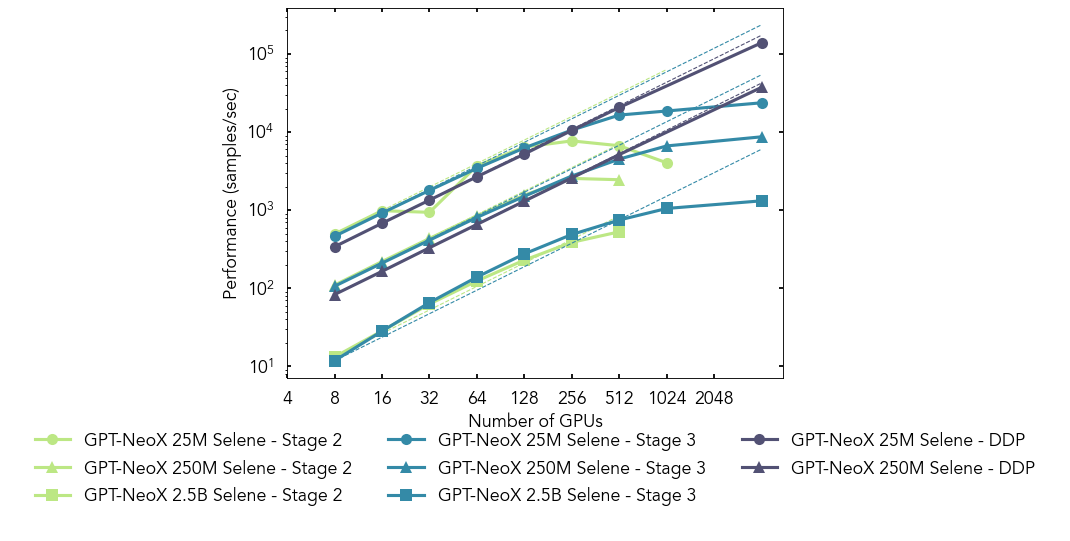

In [67]:
experiments = {
    "GPT-NeoX 25M Selene - Stage 2": {
        "color": "#BCE784",
        "marker": "o",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128], 
        "thoughputs": [495.356, 986.310, 939.002, 3704.336, 6443.827, 7715.576, 6688.090, 4042.093]
    }, 
    "GPT-NeoX 250M Selene - Stage 2": {
        "color": "#BCE784",
        "marker": "^",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16, 32, 64]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16, 32, 64], 
        "thoughputs": [109.816, 220.219, 434.422, 845.196, 1559.877, 2552.644, 2455.611]
    },
    "GPT-NeoX 2.5B Selene - Stage 2": {
        "color": "#BCE784",
        "marker": "s",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16, 32, 64]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16, 32, 64], 
        "thoughputs": [13.210, 28.463, 62.836, 124.199, 229.940, 387.796, 528.979]
    },
    "GPT-NeoX 25M Selene - Stage 3": {
        "color": "#348AA7",
        "marker": "o",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128, 512]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128, 512], 
        "thoughputs": [463.065, 919.896, 1793.339, 3443.261, 6276.428, 10619.88, 16527.193, 18635.293, 23733.141]
    }, 
    "GPT-NeoX 250M Selene - Stage 3": {
        "color": "#348AA7",
        "marker": "^",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16, 32, 64, 128, 512]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16, 32, 64, 128, 512], 
        "thoughputs": [106.229, 210.121, 413.342, 808.874, 1509.376, 2741.311, 4517.886, 6651.950, 8705.693]
    },
    "GPT-NeoX 2.5B Selene - Stage 3": {
        "color": "#348AA7",
        "marker": "s",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128, 512]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128, 512], 
        "thoughputs": [11.822, 28.283, 65.589, 139.286, 276.247, 489.100, 749.027, 1052.997, 1318.296]
    },
    "GPT-NeoX 25M Selene - DDP": {
        "color": "#525174",
        "marker": "o",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 512]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 512], 
        "thoughputs": [340.501, 680.291, 1346.698, 2683.697, 5233.406, 10522.396, 20665.555, 139524.875]
    }, 
    "GPT-NeoX 250M Selene - DDP": {
        "color": "#525174",
        "marker": "^",
        "gpus": [8*x for x in [1.0, 2.0, 4.0, 8.0, 16, 32, 64, 512]],
        "nodes": [1.0, 2.0, 4.0, 8.0, 16, 32, 64, 512], 
        "thoughputs": [83.142, 164.777, 330.566, 657.568, 1306.981, 2588.975, 5154.884, 37491.809]
    }
}

node_range = [4*x for x in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]]

plot_scaling_performance_gpus(experiments, node_range, ncol=3)